# 数理シミュレーション
# 21T344 永田 歩

In [17]:
from deap import base, creator, tools
import numpy as np
import random
# base.Fitnessを継承するFitnessMaxクラスを定義する
# 最大化問題のためweightsは(1.0,)
# 注意：1.0のあとにカンマが必要
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
# listを継承するIndividualクラスを定義する
# GAの個体となる
creator.create('Individual', list, fitness=creator.FitnessMax)
# ツールボックスを定義する
toolbox = base.Toolbox()
# ツールボックスにattr_boolオペレータを登録する
# attr_boolオペレータは、0,1のランダムな変数を返す
toolbox.register('attr_bool', random.randint, 0,1)
# individualオペレータを登録する
# individualオペレータは、attr_boolオペレータを70回実行した結果をIndividualクラスに代入する
# 具体的にはランダムに0,1の値をもつ70要素からなるリストを定義している
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, 70)
# pupulationオペレータを登録する
# tools.initRepeatのn（何回実行するか）はオペレータ実行時に指定する
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
# individualはリスト（正確にはlistを継承したcreator.Individualクラス）
# 注意：評価値はタプルで返す必要があるため、sum()のあとに,が必要

price = [873, 435, 599, 960, 763, 834, 190, 935, 648, 636, 182, 410, 696, 497,
        596, 733, 630, 144, 605, 789, 919, 183, 912, 514, 506, 999, 246, 738,
        244, 829, 131, 581, 249, 377, 140, 314, 707, 804, 725, 396, 544, 571,
        368, 516, 986, 551, 458, 755, 876, 123, 361, 810, 511, 106, 477, 397,
        643, 392, 983, 629, 217, 568, 422, 113, 186, 805, 484, 278, 661, 676]
value = [3, 4, 3, 5, 1, 3, 1, 4, 5, 5, 2, 3, 2, 1,
        4, 4, 2, 1, 4, 2, 1, 5, 4, 2, 1, 1, 4, 2,
        3, 1, 2, 2, 4, 5, 1, 3, 5, 4, 3, 5, 5, 1,
        2, 3, 5, 1, 2, 1, 1, 5, 5, 5, 4, 3, 2, 2,
        3, 5, 4, 2, 3, 2, 4, 4, 2, 5, 2, 3, 5, 1]

# 新規評価関数の定義
def evalKnapsack(individual):
    penalty = 5000
    total_price = np.dot(price, individual)
    total_value = np.dot(value, individual)
    if total_price <= 5000:
        return total_value,
    else:
        return total_value - (total_price - penalty),
# evaluateオペレータを登録する、GAの評価関数
toolbox.register('evaluate', evalKnapsack)
# mateオペレータを登録する、GAの交叉、tools.cxTwoPointは2点交叉
toolbox.register('mate', tools.cxTwoPoint)
# mutateオペレータを登録する、GAの突然変異、tools.mutFlipBitはランダムにビットを反転
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
# selectオペレータを登録する、GAの選択、tools.selTournamentはトーナメント選択
toolbox.register('select', tools.selTournament, tournsize=3)
# 定数の定義
CXPB = 0.5 # 交叉率
MUTPB = 0.2 # 突然変異率
# 個体数300の遺伝子プールを作成する
pop = toolbox.population(n=300)
# 各個体に評価関数を適用し適応度を取得する
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit
g = 0 # 世代数を0で初期化する
fits = [ind.fitness.values[0] for ind in pop]
# 適応度が100の個体がある場合、または世代数が1000世代になった場合はループを終了する
while g < 1000:
    # 選択 offspringは子孫という意味
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))
    # 交叉 offspringの偶数番[::2]とoffspringの奇数番[1::2]の個体を取り出し交叉する
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    # 突然変異
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    # 交叉または突然変異した個体のみ取得する（評価値を削除した個体のfitness.validはFalseとなっている）
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    # 再評価対象の個体を評価し適応度を付与する
    fitness = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitness):
        ind.fitness.values = fit
    # 遺伝子プールを更新する
    pop = offspring
    fits = [ind.fitness.values[0] for ind in pop]
    g += 1 # 世代数を1つ増やす
    # 10世代ごとにログを表示する
    if g == 1 or g % 1000 == 0:
        print('世代数：{}'.format(g))
        print('{}'.format(pop[np.argmax(fits)]))
        print('最良値(満足度)：{:.4f}'.format(np.max(fits)))
        print('金額：{:}\n'.format(np.sum(np.array(price)*pop[np.argmax(fits)])))

世代数：1
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
最良値(満足度)：-6570.0000
金額：11626

世代数：1000
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]
最良値(満足度)：70.0000
金額：4976



- オペレータ（選択、交叉、突然変異）やGAのパラメータ（個体数、選択 率、交叉率、突然変異率など）を変化させ、結果に違いがでるかどうか考察せよ。

c:\Users\81808\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\81808\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


個体数: 100
最良値(満足度)：71.0000
金額：4999

個体数: 200
最良値(満足度)：69.0000
金額：4982

個体数: 300
最良値(満足度)：71.0000
金額：4955

個体数: 400
最良値(満足度)：71.0000
金額：4955



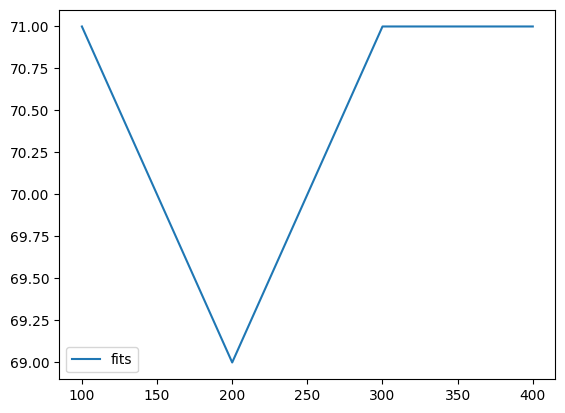

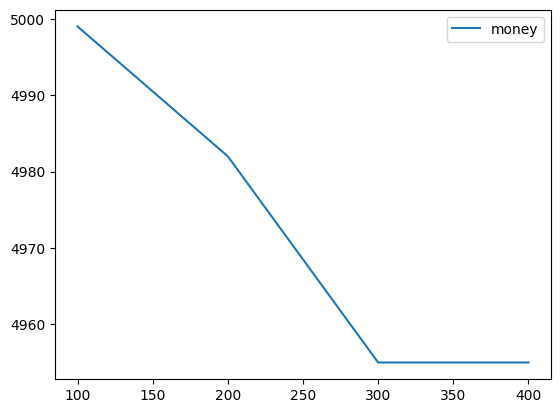

In [15]:
#変化させる
import matplotlib.pyplot as plt
import numpy as np
from deap import base, creator, tools
import random

n_list = np.arange(100, 500, 100)
fits_list = []
price_list = []

for n in n_list:
    # base.Fitnessを継承するFitnessMaxクラスを定義する
    # 最大化問題のためweightsは(1.0,)
    # 注意：1.0のあとにカンマが必要
    creator.create('FitnessMax', base.Fitness, weights=(1.0,))
    # listを継承するIndividualクラスを定義する
    # GAの個体となる
    creator.create('Individual', list, fitness=creator.FitnessMax)
    # ツールボックスを定義する
    toolbox = base.Toolbox()
    # ツールボックスにattr_boolオペレータを登録する
    # attr_boolオペレータは、0,1のランダムな変数を返す
    toolbox.register('attr_bool', random.randint, 0,1)
    # individualオペレータを登録する
    # individualオペレータは、attr_boolオペレータを70回実行した結果をIndividualクラスに代入する
    # 具体的にはランダムに0,1の値をもつ70要素からなるリストを定義している
    toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, 70)
    # pupulationオペレータを登録する
    # tools.initRepeatのn（何回実行するか）はオペレータ実行時に指定する
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    # individualはリスト（正確にはlistを継承したcreator.Individualクラス）
    # 注意：評価値はタプルで返す必要があるため、sum()のあとに,が必要

    price = [873, 435, 599, 960, 763, 834, 190, 935, 648, 636, 182, 410, 696, 497,
            596, 733, 630, 144, 605, 789, 919, 183, 912, 514, 506, 999, 246, 738,
            244, 829, 131, 581, 249, 377, 140, 314, 707, 804, 725, 396, 544, 571,
            368, 516, 986, 551, 458, 755, 876, 123, 361, 810, 511, 106, 477, 397,
            643, 392, 983, 629, 217, 568, 422, 113, 186, 805, 484, 278, 661, 676]
    value = [3, 4, 3, 5, 1, 3, 1, 4, 5, 5, 2, 3, 2, 1,
            4, 4, 2, 1, 4, 2, 1, 5, 4, 2, 1, 1, 4, 2,
            3, 1, 2, 2, 4, 5, 1, 3, 5, 4, 3, 5, 5, 1,
            2, 3, 5, 1, 2, 1, 1, 5, 5, 5, 4, 3, 2, 2,
            3, 5, 4, 2, 3, 2, 4, 4, 2, 5, 2, 3, 5, 1]

    # 新規評価関数の定義
    def evalKnapsack(individual):
        penalty = 5000
        total_price = np.dot(price, individual)
        total_value = np.dot(value, individual)
        if total_price <= 5000:
            return total_value,
        else:
            return total_value - (total_price - penalty),
    # evaluateオペレータを登録する、GAの評価関数
    toolbox.register('evaluate', evalKnapsack)
    # mateオペレータを登録する、GAの交叉、tools.cxTwoPointは2点交叉
    toolbox.register('mate', tools.cxTwoPoint)
    # mutateオペレータを登録する、GAの突然変異、tools.mutFlipBitはランダムにビットを反転
    toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
    # selectオペレータを登録する、GAの選択、tools.selTournamentはトーナメント選択
    toolbox.register('select', tools.selTournament, tournsize=3)
    # 定数の定義
    CXPB = 0.5
    MUTPB = 0.2
    # 個体数300の遺伝子プールを作成する
    pop = toolbox.population(n=n)  # 個体数
    # 各個体に評価関数を適用し適応度を取得する
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    g = 0 # 世代数を0で初期化する
    fits = [ind.fitness.values[0] for ind in pop]
    # 適応度が100の個体がある場合、または世代数が1000世代になった場合はループを終了する
    while g < 1000:
        # 選択 offspringは子孫という意味
        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))
        # 交叉 offspringの偶数番[::2]とoffspringの奇数番[1::2]の個体を取り出し交叉する
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        # 突然変異
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        # 交叉または突然変異した個体のみ取得する（評価値を削除した個体のfitness.validはFalseとなっている）
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        # 再評価対象の個体を評価し適応度を付与する
        fitness = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitness):
            ind.fitness.values = fit
        # 遺伝子プールを更新する
        pop = offspring
        fits = [ind.fitness.values[0] for ind in pop]
        g += 1 # 世代数を1つ増やす
        # 10世代ごとにログを表示する
        if g % 1000 == 0:
            print(f"個体数: {n}")
            print('最良値(満足度)：{:.4f}'.format(np.max(fits)))
            print('金額：{:}\n'.format(np.sum(np.array(price)*pop[np.argmax(fits)])))
            fits_list.append(np.max(fits))
            price_list.append(np.sum(np.array(price)*pop[np.argmax(fits)]))
plt.plot(np.array(n_list),np.array(fits_list),label="fits",linestyle='-')
plt.legend()
plt.show()
plt.plot(np.array(n_list),np.array(price_list),label="money",linestyle='-')        
plt.legend()
plt.show()

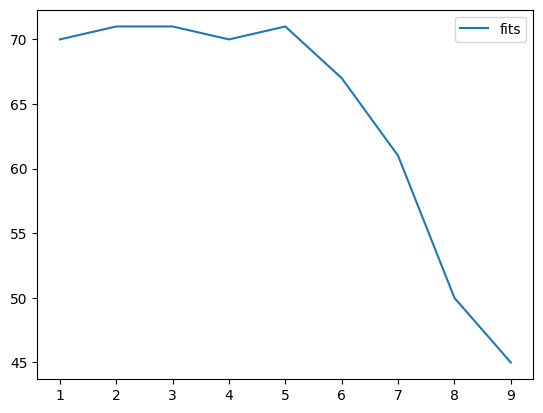

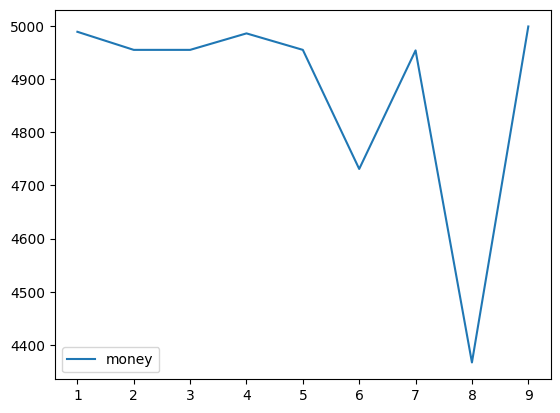

In [14]:
plt.plot(mutpb,np.array(fits_list),label="fits",linestyle='-')
plt.legend()
plt.show()
plt.plot(mutpb,np.array(price_list),label="money",linestyle='-')        
plt.legend()
plt.show()

In [ ]:
# 
import matplotlib.pyplot as plt



plt.legend()
plt.show()

In [ ]:
from deap import base, creator, tools
import numpy as np
import random
# base.Fitnessを継承するFitnessMaxクラスを定義する
# 最大化問題のためweightsは(1.0,)
# 注意：1.0のあとにカンマが必要
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
# listを継承するIndividualクラスを定義する
# GAの個体となる
creator.create('Individual', list, fitness=creator.FitnessMax)
# ツールボックスを定義する
toolbox = base.Toolbox()
# ツールボックスにattr_boolオペレータを登録する
# attr_boolオペレータは、0,1のランダムな変数を返す
toolbox.register('attr_bool', random.randint, 0,1)
# individualオペレータを登録する
# individualオペレータは、attr_boolオペレータを70回実行した結果をIndividualクラスに代入する
# 具体的にはランダムに0,1の値をもつ70要素からなるリストを定義している
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, 70)
# pupulationオペレータを登録する
# tools.initRepeatのn（何回実行するか）はオペレータ実行時に指定する
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
# individualはリスト（正確にはlistを継承したcreator.Individualクラス）
# 注意：評価値はタプルで返す必要があるため、sum()のあとに,が必要

price = [873, 435, 599, 960, 763, 834, 190, 935, 648, 636, 182, 410, 696, 497,
        596, 733, 630, 144, 605, 789, 919, 183, 912, 514, 506, 999, 246, 738,
        244, 829, 131, 581, 249, 377, 140, 314, 707, 804, 725, 396, 544, 571,
        368, 516, 986, 551, 458, 755, 876, 123, 361, 810, 511, 106, 477, 397,
        643, 392, 983, 629, 217, 568, 422, 113, 186, 805, 484, 278, 661, 676]
value = [3, 4, 3, 5, 1, 3, 1, 4, 5, 5, 2, 3, 2, 1,
        4, 4, 2, 1, 4, 2, 1, 5, 4, 2, 1, 1, 4, 2,
        3, 1, 2, 2, 4, 5, 1, 3, 5, 4, 3, 5, 5, 1,
        2, 3, 5, 1, 2, 1, 1, 5, 5, 5, 4, 3, 2, 2,
        3, 5, 4, 2, 3, 2, 4, 4, 2, 5, 2, 3, 5, 1]

# 新規評価関数の定義
def evalKnapsack(individual):
    penalty = 5000
    total_price = np.dot(price, individual)
    total_value = np.dot(value, individual)
    if total_price <= 5000:
        return total_value,
    else:
        return total_value - (total_price - penalty),
# evaluateオペレータを登録する、GAの評価関数
toolbox.register('evaluate', evalKnapsack)
# mateオペレータを登録する、GAの交叉、tools.cxTwoPointは2点交叉
toolbox.register('mate', tools.cxTwoPoint)
# mutateオペレータを登録する、GAの突然変異、tools.mutFlipBitはランダムにビットを反転
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
# selectオペレータを登録する、GAの選択、tools.selTournamentはトーナメント選択
toolbox.register('select', tools.selTournament, tournsize=3)
# 定数の定義
CXPB = 0.5 # 交叉率
MUTPB = 0.2 # 突然変異率
# 個体数300の遺伝子プールを作成する
pop = toolbox.population(n=300)  # 個体数
# 各個体に評価関数を適用し適応度を取得する
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit
g = 0 # 世代数を0で初期化する
fits = [ind.fitness.values[0] for ind in pop]
# 適応度が100の個体がある場合、または世代数が1000世代になった場合はループを終了する
while g < 1000:
    # 選択 offspringは子孫という意味
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))
    # 交叉 offspringの偶数番[::2]とoffspringの奇数番[1::2]の個体を取り出し交叉する
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    # 突然変異
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    # 交叉または突然変異した個体のみ取得する（評価値を削除した個体のfitness.validはFalseとなっている）
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    # 再評価対象の個体を評価し適応度を付与する
    fitness = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitness):
        ind.fitness.values = fit
    # 遺伝子プールを更新する
    pop = offspring
    fits = [ind.fitness.values[0] for ind in pop]
    g += 1 # 世代数を1つ増やす
    # 10世代ごとにログを表示する
    if g == 1 or g % 1000 == 0:
        print('世代数：{}'.format(g))
        print('{}'.format(pop[np.argmax(fits)]))
        print('最良値(満足度)：{:.4f}'.format(np.max(fits)))
        print('金額：{:}\n'.format(np.sum(np.array(price)*pop[np.argmax(fits)])))